In [12]:
import tensorflow as tf
from keras.datasets import mnist
from matplotlib import pyplot

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


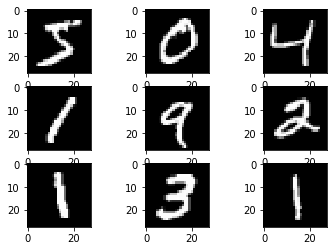

In [13]:
(trainX, trainy), (testX, testy) = mnist.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [8]:
trainX.shape

(60000, 28, 28)

In [6]:
trainy.shape

(60000,)

In [9]:
testX.shape

(10000, 28, 28)

In [10]:
trainy.shape

(60000,)

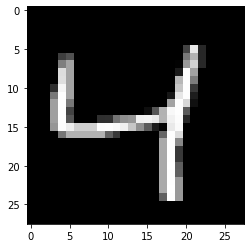

In [54]:
# to check out a single image..
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(trainX[2].reshape(28,28), cmap = 'gist_gray')

In [19]:
# setting up the neural model
# dropout randomly assings zero/deactivates certain hidden neurons to prevent over-fitting.
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


In [27]:
predictions = model(trainX[:1]).numpy()
predictions

array([[-17.330036,  30.316816,  28.03478 , 118.0073  , -47.756973,
        139.75893 , -16.40235 , -37.45827 ,  40.740044,  81.0343  ]],
      dtype=float32)

In [28]:
# softmax converts the above 'logits' to probabilites for the classes
tf.nn.softmax(predictions).numpy()

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.5759321e-10,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.9492191e-44, 3.1348704e-26]], dtype=float32)

In [29]:
# The losses.SparseCategoricalCrossentropy loss takes a vector of logits and a True index
# and returns a scalar loss for each example.
# This untrained model gives probabilities close to random (1/10 for each class), 
# so the initial loss should be close to -tf.log(1/10) ~= 2.3.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(trainy[:1], predictions).numpy()

0.0

In [39]:
# fitting the data and training the model
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
final_model = model.fit(trainX, trainy, epochs=10, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 113us/sample - loss: 0.3158 - accuracy: 0.9306 - val_loss: 0.2129 - val_accuracy: 0.9607
Epoch 2/10
54000/54000 [==============================] - 6s 104us/sample - loss: 0.2954 - accuracy: 0.9305 - val_loss: 0.2451 - val_accuracy: 0.9573
Epoch 3/10
54000/54000 [==============================] - 6s 112us/sample - loss: 0.2800 - accuracy: 0.9329 - val_loss: 0.2347 - val_accuracy: 0.9613
Epoch 4/10
54000/54000 [==============================] - 6s 103us/sample - loss: 0.3000 - accuracy: 0.9306 - val_loss: 0.2055 - val_accuracy: 0.9635
Epoch 5/10
54000/54000 [==============================] - 6s 102us/sample - loss: 0.2792 - accuracy: 0.9339 - val_loss: 0.1952 - val_accuracy: 0.9580
Epoch 6/10
54000/54000 [==============================] - 6s 104us/sample - loss: 0.2865 - accuracy: 0.9331 - val_loss: 0.2135 - val_accuracy: 0.9598
Epoch 7/10
54000/54000 [===========================

In [40]:
model.evaluate(testX, testy, verbose=2)

10000/10000 - 0s - loss: 0.5052 - accuracy: 0.9504


[0.5052356852610596, 0.9504]

In [41]:
'''
To directly get probabilites at the end of the model prediction, we can attach softmax to the model as a layer...

probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
probability_model(x_test[:5])

'''

'\nTo directly get probabilites at the end of the model prediction, we can attach softmax to the model as a layer...\n\nprobability_model = tf.keras.Sequential([\n  model,\n  tf.keras.layers.Softmax()\n])\nprobability_model(x_test[:5])\n\n'

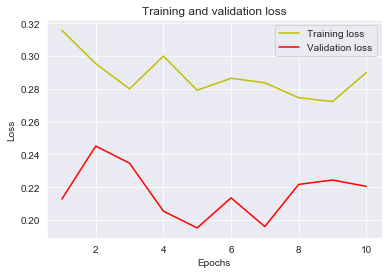

In [100]:
# Now to to get a better idea of how our model scored while learning...
loss = final_model.history['loss']
val_loss = final_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
# That model of ours was trained using drop-out in the neural network.
# let's see how does a model without drop-out fare against it.

In [46]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])


In [47]:
model2.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
fin_model2 = model2.fit(trainX, trainy, epochs=10, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 6s 117us/sample - loss: 2.3607 - accuracy: 0.8423 - val_loss: 0.3994 - val_accuracy: 0.9083
Epoch 2/10
54000/54000 [==============================] - 5s 101us/sample - loss: 0.3878 - accuracy: 0.9053 - val_loss: 0.3006 - val_accuracy: 0.9323
Epoch 3/10
54000/54000 [==============================] - 5s 100us/sample - loss: 0.2886 - accuracy: 0.9258 - val_loss: 0.2427 - val_accuracy: 0.9408
Epoch 4/10
54000/54000 [==============================] - 5s 97us/sample - loss: 0.2580 - accuracy: 0.9327 - val_loss: 0.2423 - val_accuracy: 0.9447
Epoch 5/10
54000/54000 [==============================] - 5s 101us/sample - loss: 0.2392 - accuracy: 0.9396 - val_loss: 0.2201 - val_accuracy: 0.9468
Epoch 6/10
54000/54000 [==============================] - 5s 102us/sample - loss: 0.2205 - accuracy: 0.9436 - val_loss: 0.2135 - val_accuracy: 0.9552
Epoch 7/10
54000/54000 [============================

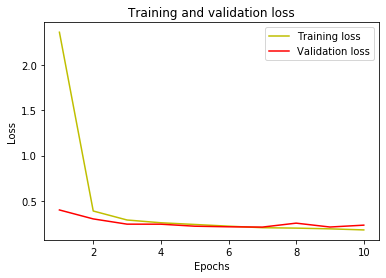

In [48]:
# Now to look how the second model did...
loss = fin_model2.history['loss']
val_loss = fin_model2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
with_dropout = plt.show()

                      Comparing the differences in loss due to drop-out layer                       


<Figure size 432x288 with 0 Axes>

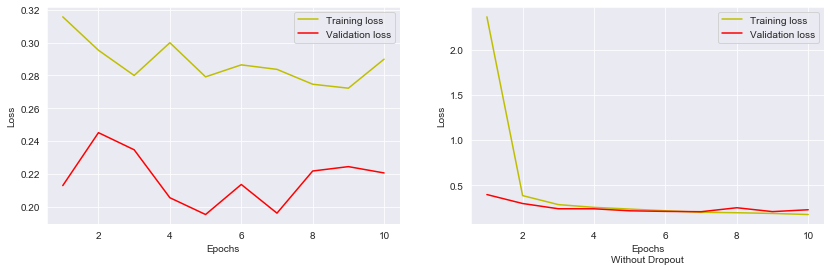

In [99]:
# As it's visible, that the loss plateaus after 3 epochs or so.. whereas in the model with drop-out we had better results.
# For ease, lets compare them side by side.

plt.tight_layout();
fig, (ax1, ax2) = plt.subplots(1, 2);
plt.subplots_adjust(left=0, bottom=None, right=1.8, top=None, wspace=None, hspace=None);
loss = final_model.history['loss']
val_loss = final_model.history['val_loss']
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'y', label='Training loss');
ax1.plot(epochs, val_loss, 'r', label='Validation loss');
ax1.set_xlabel('Epochs');
ax1.set_ylabel('Loss');
ax1.legend();

loss = fin_model2.history['loss']
val_loss = fin_model2.history['val_loss']
epochs = range(1, len(loss) + 1)
ax2.plot(epochs, loss, 'y', label='Training loss');
ax2.plot(epochs, val_loss, 'r', label='Validation loss');
ax2.set_xlabel('Epochs\nWithout Dropout');
ax2.set_ylabel('Loss');
ax2.legend();
print("Comparing the differences in loss due to drop-out layer".center(100))